# Quantum - Grover's Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer


In [2]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

Solutions:
|0111>
|1001>


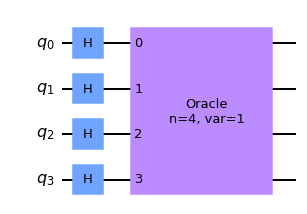

In [3]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 4
oracle = grover_problem_oracle(n, variant=1, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.draw('mpl')

In [4]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # do multi-controlled-z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) # multi-controlled toffoli
    qc.h(nqubits-1)
    # apply trnasformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # apply trnasformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # we will return diffuser as a gate 
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s
    
    

Solutions:
|0111>
|1001>


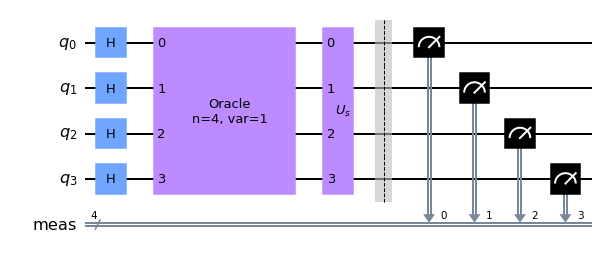

In [5]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 4
oracle = grover_problem_oracle(n, variant=1, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.measure_all()
qc.draw('mpl')

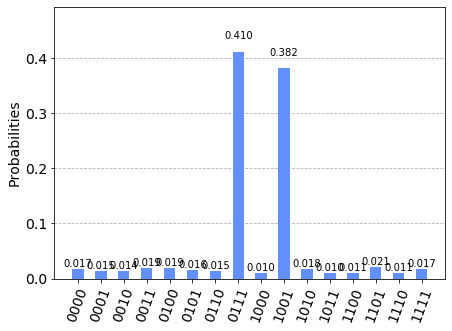

In [6]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

Solutions:
|0011>


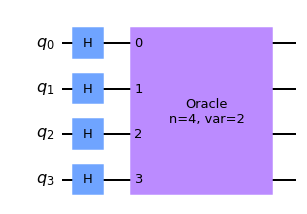

In [7]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 4
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.draw('mpl')

Solutions:
|0011>


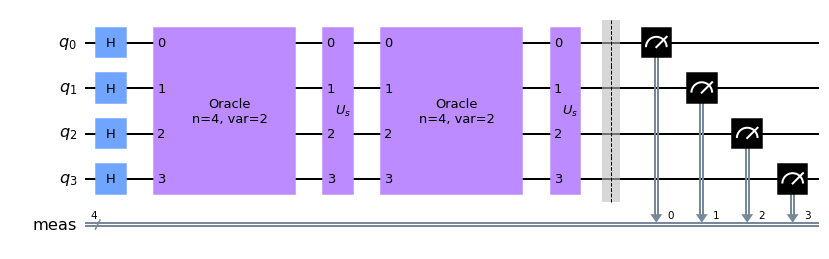

In [8]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 4
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.measure_all()
qc.draw('mpl')

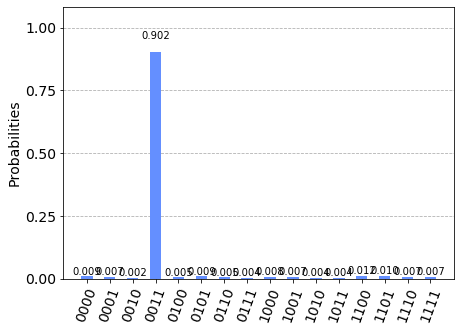

In [9]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## Laboratory Activity # 1

Solutions:
|1101>


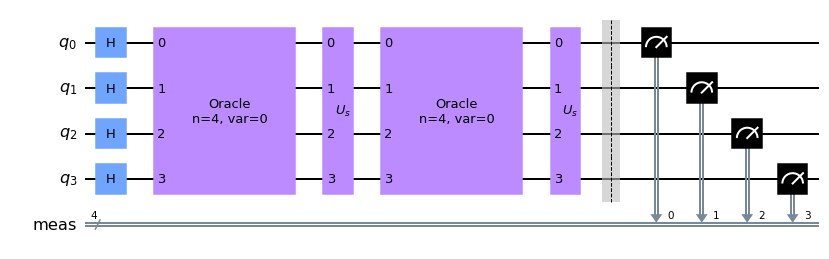

In [10]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 4
oracle = grover_problem_oracle(n, variant=0, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.append(oracle, [0, 1, 2, 3])
qc.append(diffuser(n), [0, 1, 2, 3])
qc.measure_all()
qc.draw('mpl')

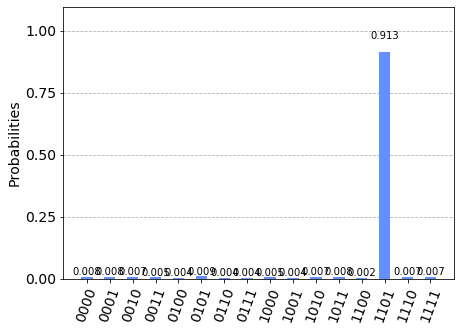

In [11]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

## Laboratory Activity # 2

Solutions:
|00100>


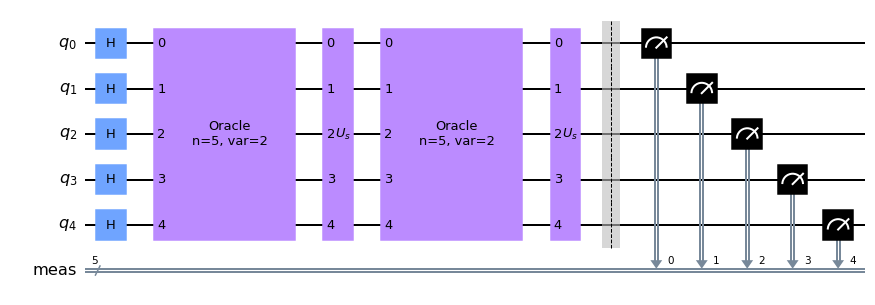

In [12]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.measure_all()
qc.draw('mpl')

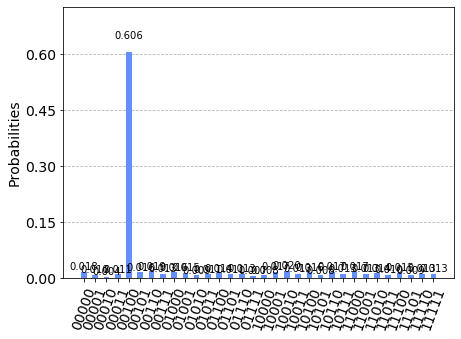

In [13]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

Solutions:
|00100>


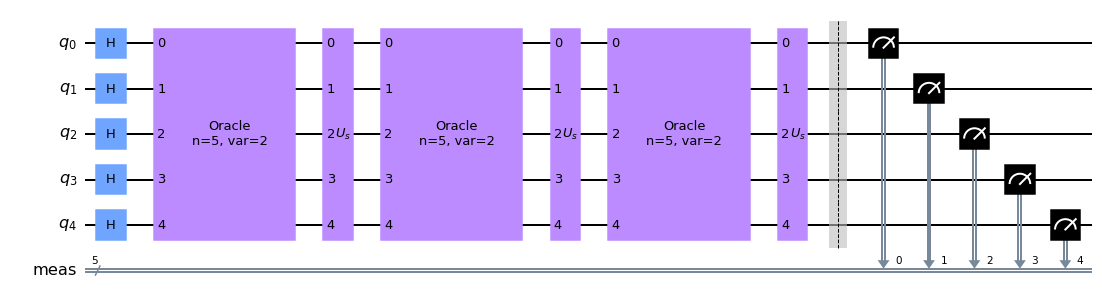

In [14]:
from qiskit_textbook.problems import grover_problem_oracle
### exmaple usage
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True) # 0th varient of oracle, with n qubits 
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.append(oracle, [0, 1, 2, 3, 4])
qc.append(diffuser(n), [0, 1, 2, 3, 4])
qc.measure_all()
qc.draw('mpl')

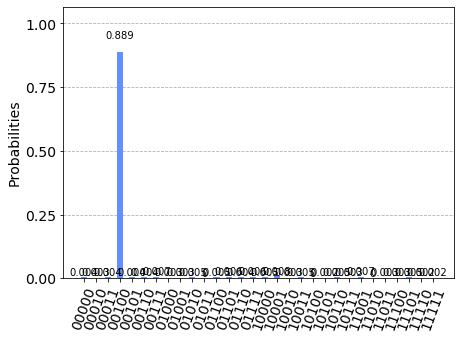

In [15]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

2 iterations is enough but 3 is better. 